In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('transaction.csv')

In [3]:
df.head()

,product_code,product_type,customer_code,market_code,market_name,order_date,sales_qty,upc,sales_amount,zone,net_profit
0,Prod001,Syrup,Cus001,Mark001,Darbhanga,10-10-2017,100,272.1840,41241,Bihar,14022.6000
1,Prod002,Ointment,Cus003,Mark003,Bhagalpur,06-04-2018,1,37.9896,875,Bihar,837.0104
2,Prod002,Ointment,Cus003,Mark003,Bhagalpur,11-04-2018,1,37.9896,583,Bihar,545.0104
3,Prod002,Ointment,Cus004,Mark003,Bhagalpur,18-06-2018,6,37.9896,7176,Bihar,6948.0624
4,Prod003,Tablet,Cus005,Mark004,Muzaffarpur,20-11-2017,59,646.6317,40000,Bihar,1848.7297


In [4]:
(df.iloc[:,0:df.shape[1]]==0).sum()

product_code     0
product_type     0
customer_code    0
market_code      0
market_name      0
order_date       0
sales_qty        0
upc              0
sales_amount     0
zone             0
net_profit       0
dtype: int64

As the data has been cleaned in previous steps, data cleaning is not required now.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148397 entries, 0 to 148396
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   148397 non-null  object 
 1   product_type   148397 non-null  object 
 2   customer_code  148397 non-null  object 
 3   market_code    148397 non-null  object 
 4   market_name    148397 non-null  object 
 5   order_date     148397 non-null  object 
 6   sales_qty      148397 non-null  int64  
 7   upc            148397 non-null  float64
 8   sales_amount   148397 non-null  int64  
 9   zone           148397 non-null  object 
 10  net_profit     148397 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 12.5+ MB


### Differentiate input columns and output column

In [6]:
df.columns

Index(['product_code', 'product_type', 'customer_code', 'market_code',
       'market_name', 'order_date', 'sales_qty', 'upc', 'sales_amount', 'zone',
       'net_profit'],
      dtype='object')

In [7]:
input_col = ['product_code', 'product_type', 'customer_code', 'market_code',
       'market_name', 'order_date', 'sales_qty', 'upc', 'sales_amount', 'zone']
target_col = 'net_profit'

In [8]:
inputs = df[input_col]
target = df[target_col]

### Identify numerical and categorical columns

In [9]:
num_col = ['sales_qty','upc', 'sales_amount']

cat_col = ['product_code', 'product_type', 'customer_code', 'market_code',
       'market_name', 'order_date','zone']

### Scale numeric columns

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler().fit(inputs[num_col])

In [12]:
inputs[num_col] = scaler.transform(inputs[num_col])

In [13]:
inputs[num_col]

,sales_qty,upc,sales_amount
0,0.007047,0.013914,0.027292
1,0.000000,0.001904,0.000576
2,0.000000,0.001904,0.000383
3,0.000356,0.001904,0.004746
4,0.004129,0.033115,0.026470
...,...,...,...
148392,0.000000,0.020549,0.000257
148393,0.000000,0.020549,0.000438
148394,0.000000,0.020549,0.000410
148395,0.000427,0.020549,0.005705


### Encode categorical columns into numerical

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[cat_col])
encoded_cols = list(encoder.get_feature_names_out(cat_col))

In [16]:
inputs[encoded_cols] = encoder.transform(inputs[cat_col])

Finally, let's extract out all the numeric data for training.

In [17]:
X = inputs[num_col + encoded_cols]

So, X is the input df and target is the target (y) column.

In [18]:
X.columns

Index(['sales_qty', 'upc', 'sales_amount', 'product_code_Prod001',
       'product_code_Prod002', 'product_code_Prod003', 'product_code_Prod004',
       'product_code_Prod005', 'product_code_Prod006', 'product_code_Prod007',
       ...
       'order_date_31-08-2018', 'order_date_31-10-2017',
       'order_date_31-10-2018', 'order_date_31-10-2019',
       'order_date_31-12-2018', 'order_date_31-12-2019', 'zone_Bihar',
       'zone_Jharkhand', 'zone_UP', 'zone_West_Bengal'],
      dtype='object', length=1222)

In [19]:
len(X.columns)

1222

## XGradient Boosting

In [20]:
from xgboost import XGBRegressor

In [21]:
# ?XGBRegressor (random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [22]:
model = XGBRegressor()

In [23]:
%%time
model.fit(X, target)

Wall time: 3min 41s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Prediction

In [24]:
preds = model.predict(X)

In [25]:
preds

array([20151.877  ,   788.0244 ,   495.96692, ...,   367.80884,
        6678.6865 ,  2515.1406 ], dtype=float32)

#### Evaluation

In [26]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [27]:
rmse(preds, target)

847.48387598766

In [28]:
df[target_col]

0         14022.600000
1           837.010400
2           545.010400
3          6948.062400
4          1848.729700
              ...     
148392       -7.582848
148393      265.417152
148394      223.417152
148395     5813.920066
148396     2587.251457
Name: net_profit, Length: 148397, dtype: float64

#### Feature Importance

In [29]:
importance_df = pd.DataFrame({
    'Features': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance',ascending = False)

importance_df.head(10)

,Features,Importance
165,product_code_Prod163,0.756589
89,product_code_Prod087,0.125239
1,upc,0.097899
0,sales_qty,0.002898
127,product_code_Prod125,0.002395
85,product_code_Prod083,0.002061
2,sales_amount,0.001936
344,product_type_Syrup,0.001927
384,market_code_Mark001,0.001014
92,product_code_Prod090,0.000896


<AxesSubplot:title={'center':'Top 10 Importat Features by Their Weights'}, xlabel='Importance', ylabel='Features'>

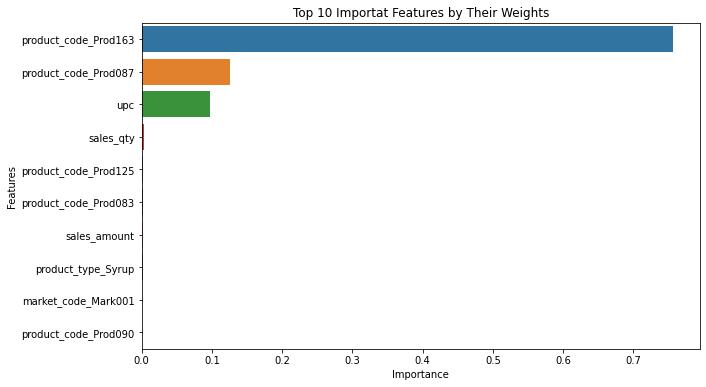

In [30]:
# Make a bar plot for the top ten important features

import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Top 10 Importat Features by Their Weights')
sns.barplot(data=importance_df.head(10), x='Importance', y='Features')

## XGradient Boosting With Splitted Data

Let's split the data into training and testing data set and then train Gradient Boosting on it. We will not use K-Fold splitting and validation in this case because K-Fold is good for small data.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_X,test_X,train_target,test_target = train_test_split(X,target,test_size=0.3,random_state=42)

Let's make a helper function which would calculate RMSE for different ML-Regression algorithm.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

def train_test_rmse(model, train_X, train_target, test_X, test_target):
    model.fit(train_X, train_target)
    train_rmse = rmse(model.predict(train_X), train_target)
    test_rmse = rmse(model.predict(test_X), test_target)
    print(' Model:',model,'\n','Train RMSE:',train_rmse,'\n','Test RMSE:',test_rmse)
    #return model, train_rmse, test_rmse

In [34]:
train_test_rmse(LinearRegression(), train_X, train_target, test_X, test_target)

 Model: LinearRegression() 
 Train RMSE: 14146.149348062661 
 Test RMSE: 4405348541661.3955


In [35]:
train_test_rmse(Ridge(), train_X, train_target, test_X, test_target)

 Model: Ridge() 
 Train RMSE: 49240.2546357613 
 Test RMSE: 16899.04573832682


In [36]:
train_test_rmse(Lasso(), train_X, train_target, test_X, test_target)

 Model: Lasso() 
 Train RMSE: 14213.49845408942 
 Test RMSE: 20735.35616495254


In [37]:
train_test_rmse(DecisionTreeRegressor(), train_X, train_target, test_X, test_target)

 Model: DecisionTreeRegressor() 
 Train RMSE: 1.9746806294964207e-12 
 Test RMSE: 18231.61428590537


In [38]:
#train_test_rmse(SVR(), train_X, train_target, test_X, test_target)

In [39]:
train_test_rmse(XGBRegressor(), train_X, train_target, test_X, test_target)

 Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 
 Train RMSE: 679.8010684006217 
 Test RMSE: 11067.628432146363


    1. Lasso Regression and XGB regression models shown best results as compared to other regression algorithms.
    2. We will pick XGB regressor and try to emprove the model even further with Hyperparameter Tuning.

## Model Improvement

### Hyperparameter Tuning - XGBoost

Let's deine a helper function for tuning and testing hyperparameters.

In [40]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_X, train_target)
    train_rmse = rmse(model.predict(train_X), train_target)
    test_rmse = rmse(model.predict(test_X), test_target)
    print('Train RMSE: {}, Test RMSE: {}'.format(train_rmse, test_rmse))

In [41]:
# Model With any Hyperparameter Tuning 

test_params()

Train RMSE: 679.8010684006217, Test RMSE: 11067.628432146363


#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.


In [42]:
test_params(n_estimators=10)

Train RMSE: 23497.367853593343, Test RMSE: 17162.288364310687


In [43]:
test_params(n_estimators=30)

Train RMSE: 3002.248569643611, Test RMSE: 11871.92871056094


In [44]:
test_params(n_estimators=100)

Train RMSE: 679.8010684006217, Test RMSE: 11067.628432146363


In [45]:
test_params(n_estimators=240)

Train RMSE: 281.91961719333653, Test RMSE: 11001.267886883588


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [46]:
test_params(max_depth=2)

Train RMSE: 5064.169733987468, Test RMSE: 13271.797120335723


In [47]:
test_params(max_depth=5)

Train RMSE: 1011.1036946011195, Test RMSE: 13732.512814653099


In [48]:
test_params(max_depth=10)

Train RMSE: 269.502607884489, Test RMSE: 14929.074415061335


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [49]:
test_params(learning_rate=0.01)

Train RMSE: 71300.04653750574, Test RMSE: 22990.776154199062


In [50]:
test_params(learning_rate=0.1)

Train RMSE: 1998.3511984359966, Test RMSE: 12139.694862577831


In [51]:
test_params(learning_rate=0.3)

Train RMSE: 679.8010684006217, Test RMSE: 11067.628432146363


In [52]:
test_params(learning_rate=0.9)

Train RMSE: 378.4889771814677, Test RMSE: 12464.466545976189


In [53]:
test_params(learning_rate=0.99)

Train RMSE: 373.352384057922, Test RMSE: 12755.837746845604


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [54]:
test_params(booster='gblinear')

Train RMSE: 14146.152974322627, Test RMSE: 20193.600094195932


#### Tuning hyperparemeters to get optimal values for all the hyperparameters would take time. I have done it by my self by running the model with different values for different hyperparameters and then concluded on the below demonstarted hyperparameter values for my final model. There is always a chance of improvement. 

### Putting all together

In [57]:
test_params(n_estimators=1000, 
            learning_rate=0.2, 
            max_depth=10, 
            subsample=0.9, 
            colsample_bytree=0.7)

Train RMSE: 34.254129473264044, Test RMSE: 15922.533031545408


Let's compare the Predicted net_sales with the actual net sales.

In [58]:
compare_df = pd.DataFrame({
    'Net Sales':test_target,
    'Predicted Net Sales':model.predict(test_X)
})
compare_df

,Net Sales,Predicted Net Sales
64587,-13898.981689,-13964.523438
144025,46947.725160,47789.402344
107682,546.475549,507.883057
61705,92.348978,190.910172
213,759.914720,788.024414
...,...,...
105282,540.138888,541.752686
24038,288.820702,296.374756
84621,115.969067,113.183098
99635,188.501566,195.149643


## Why XGBoost was used instead of other ML Regression algorithms ? I hope you got the answer.